In [1]:
import ujson
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import config
config.config_visuals()

# Load outputs

In [2]:
with open("experiments.json", "r") as f:
    exp = json.load(f)

    experiments = exp["experiments"]
    experiment_ids = exp["experiment_ids"]
    display_names = exp["display_names"]
    display_groups = exp["display_groups"]
    contexts = exp["contexts"]

In [3]:
kallisto_sleuth_path = "../data/processed/kallisto_sleuth_merge/"

rpl22_oe_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22_oe_genes.h5", key="sleuth_diff"
)
rpl22l1_oe_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22l1_oe_genes.h5", key="sleuth_diff"
)
rpl22l1_kd1_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22l1_kd1_genes.h5", key="sleuth_diff"
)
rpl22l1_kd2_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22l1_kd2_genes.h5", key="sleuth_diff"
)
rpl22_a_ko1_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22_a_ko1_genes.h5", key="sleuth_diff"
)
rpl22_a_ko2_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22_a_ko2_genes.h5", key="sleuth_diff"
)
rpl22_b_ko1_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22_b_ko1_genes.h5", key="sleuth_diff"
)
rpl22_b_ko2_genes = pd.read_hdf(
    kallisto_sleuth_path + "rpl22_b_ko2_genes.h5", key="sleuth_diff"
)

rpl22_oe_rmats = pd.read_hdf("../data/processed/rmats_merge/rpl22_oe.h5", key="rmats")
rpl22l1_oe_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22l1_oe.h5", key="rmats"
)
rpl22l1_kd1_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22l1_kd1.h5", key="rmats"
)
rpl22l1_kd2_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22l1_kd2.h5", key="rmats"
)
rpl22_a_ko1_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22_a_ko1.h5", key="rmats"
)
rpl22_a_ko2_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22_a_ko2.h5", key="rmats"
)
rpl22_b_ko1_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22_b_ko1.h5", key="rmats"
)
rpl22_b_ko2_rmats = pd.read_hdf(
    "../data/processed/rmats_merge/rpl22_b_ko2.h5", key="rmats"
)

rpl22_oe_rmats = rpl22_oe_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22l1_oe_rmats = rpl22l1_oe_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22l1_kd1_rmats = rpl22l1_kd1_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22l1_kd2_rmats = rpl22l1_kd2_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22_a_ko1_rmats = rpl22_a_ko1_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22_a_ko2_rmats = rpl22_a_ko2_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22_b_ko1_rmats = rpl22_b_ko1_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)
rpl22_b_ko2_rmats = rpl22_b_ko2_rmats.rename({"PValue": "pval", "FDR": "qval"}, axis=1)

In [7]:
def expression_splicing_overlap(genes, rmats, cutoff, title, show_labels=False, ax=None):

    if ax is None:
        fig = plt.figure(figsize=(4, 3))
        ax = plt.subplot(111)

    genes_significant = genes[genes["qval"] < cutoff]
    rmats_significant = rmats[rmats["qval"] < cutoff]

    genes_ids = set(genes_significant.index)
    rmats_ids = set(rmats_significant["GeneID"])

    len_both = len(genes_ids & rmats_ids)

    if show_labels:
        set_labels = ("Δ expressed", "Δ spliced")
    else:
        set_labels = ["", ""]

    v = venn2(
        subsets={
            "10": len(genes_ids) - len_both,
            "01": len(rmats_ids) - len_both,
            "11": len_both,
        },
        set_labels=set_labels,
        ax=ax,
    )

    for patch_id, color in zip(["10", "11", "01"], ["#4ecca3", "white", "#6eb6ff"]):

        v.get_patch_by_id(patch_id).set_alpha(1.0)
        v.get_patch_by_id(patch_id).set_color(color)
        v.get_patch_by_id(patch_id).set_lw(1)
        v.get_patch_by_id(patch_id).set_ls("solid")
        v.get_patch_by_id(patch_id).set_edgecolor("black")
        
    ax.set_title(title)
    
    return genes.loc[genes_ids & rmats_ids,"hgnc_gene"]

# Overlap between differentially expressed and spliced genes

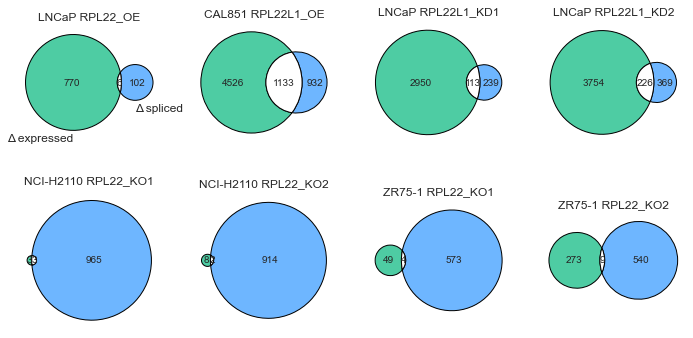

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))


expression_splicing_overlap(
    rpl22_oe_genes, rpl22_oe_rmats, title="LNCaP RPL22_OE", show_labels=True, cutoff=0.01, ax=axes[0][0]
)
expression_splicing_overlap(
    rpl22l1_oe_genes, rpl22l1_oe_rmats, title="CAL851 RPL22L1_OE", cutoff=0.01, ax=axes[0][1]
)
expression_splicing_overlap(
    rpl22l1_kd1_genes, rpl22l1_kd1_rmats, title="LNCaP RPL22L1_KD1", cutoff=0.01, ax=axes[0][2]
)
expression_splicing_overlap(
    rpl22l1_kd2_genes, rpl22l1_kd2_rmats, title="LNCaP RPL22L1_KD2", cutoff=0.01, ax=axes[0][3]
)
expression_splicing_overlap(
    rpl22_a_ko1_genes, rpl22_a_ko1_rmats, title="NCI-H2110 RPL22_KO1", cutoff=0.01, ax=axes[1][0]
)
expression_splicing_overlap(
    rpl22_a_ko2_genes, rpl22_a_ko2_rmats, title="NCI-H2110 RPL22_KO2", cutoff=0.01, ax=axes[1][1]
)
expression_splicing_overlap(
    rpl22_b_ko1_genes, rpl22_b_ko1_rmats, title="ZR75-1 RPL22_KO1", cutoff=0.01, ax=axes[1][2]
)
expression_splicing_overlap(
    rpl22_b_ko2_genes, rpl22_b_ko2_rmats, title="ZR75-1 RPL22_KO2", cutoff=0.01, ax=axes[1][3]
)

plt.savefig(
    "../plots/expression_splicing_intersections.pdf", transparent=True, bbox_inches="tight"
)

# Overlap between shRNAs and sgRNAs

## Expression

In [21]:
def expression_expression_overlap(
    genes_1, genes_2, cutoff, title, label_1, label_2, show_labels=False, ax=None
):

    if ax is None:
        fig = plt.figure(figsize=(4, 3))
        ax = plt.subplot(111)

    significant_1 = genes_1[genes_1["qval"] < cutoff]
    significant_2 = genes_2[genes_2["qval"] < cutoff]

    ids_1 = set(significant_1.index)
    ids_2 = set(significant_2.index)

    len_both = len(ids_1 & ids_2)

    if show_labels:
        set_labels = [label_1, label_2]
    else:
        set_labels = ["", ""]

    v = venn2(
        subsets={
            "10": len(ids_1) - len_both,
            "01": len(ids_2) - len_both,
            "11": len_both,
        },
        set_labels=set_labels,
        ax=ax,
    )

    for patch_id, color in zip(["10", "11", "01"], ["#9ddfd3", "white", "#03c4a1"]):

        v.get_patch_by_id(patch_id).set_alpha(1.0)
        v.get_patch_by_id(patch_id).set_color(color)
        v.get_patch_by_id(patch_id).set_lw(1)
        v.get_patch_by_id(patch_id).set_ls("solid")
        v.get_patch_by_id(patch_id).set_edgecolor("black")

    ax.set_title(title)

    return genes_1.loc[ids_1 & ids_2, "hgnc_gene"]

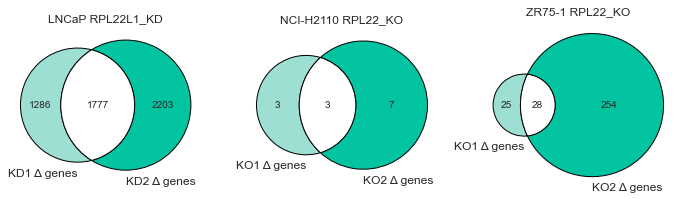

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

expression_expression_overlap(
    rpl22l1_kd1_genes,
    rpl22l1_kd2_genes,
    0.01,
    "LNCaP RPL22L1_KD",
    "KD1 Δ genes",
    "KD2 Δ genes",
    True,
    ax=axes[0],
)
expression_expression_overlap(
    rpl22_a_ko1_genes,
    rpl22_a_ko2_genes,
    0.01,
    "NCI-H2110 RPL22_KO",
    "KO1 Δ genes",
    "KO2 Δ genes",
    True,
    ax=axes[1],
)
expression_expression_overlap(
    rpl22_b_ko1_genes,
    rpl22_b_ko2_genes,
    0.01,
    "ZR75-1 RPL22_KO",
    "KO1 Δ genes",
    "KO2 Δ genes",
    True,
    ax=axes[2],
)

plt.savefig(
    "../plots/replicate_expression_intersections.pdf",
    transparent=True,
    bbox_inches="tight",
)

## Splicing

In [49]:
def splicing_splicing_overlap(
    rmats_1, rmats_2, cutoff, title, label_1, label_2, show_labels=False, ax=None
):

    if ax is None:
        fig = plt.figure(figsize=(4, 3))
        ax = plt.subplot(111)

    significant_1 = rmats_1[rmats_1["qval"] < cutoff]
    significant_2 = rmats_2[rmats_2["qval"] < cutoff]

    ids_1 = set(significant_1.index)
    ids_2 = set(significant_2.index)

    len_both = len(ids_1 & ids_2)

    if show_labels:
        set_labels = [label_1, label_2]
    else:
        set_labels = ["", ""]

    v = venn2(
        subsets={
            "10": len(ids_1) - len_both,
            "01": len(ids_2) - len_both,
            "11": len_both,
        },
        set_labels=set_labels,
        ax=ax,
    )

    for patch_id, color in zip(["10", "11", "01"], ["#a2d5f2", "white", "#51adcf"]):

        v.get_patch_by_id(patch_id).set_alpha(1.0)
        v.get_patch_by_id(patch_id).set_color(color)
        v.get_patch_by_id(patch_id).set_lw(1)
        v.get_patch_by_id(patch_id).set_ls("solid")
        v.get_patch_by_id(patch_id).set_edgecolor("black")

    ax.set_title(title)

    return rmats_1.loc[ids_1 & ids_2]

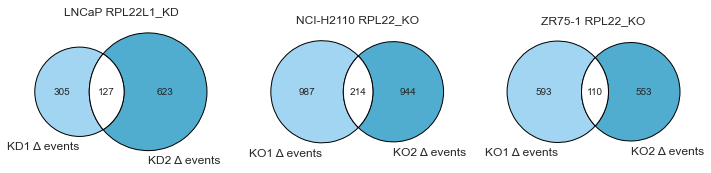

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
splicing_splicing_overlap(
    rpl22l1_kd1_rmats,
    rpl22l1_kd2_rmats,
    0.01,
    "LNCaP RPL22L1_KD",
    "KD1 Δ events",
    "KD2 Δ events",
    True,
    ax=axes[0],
)
splicing_splicing_overlap(
    rpl22_a_ko1_rmats,
    rpl22_a_ko2_rmats,
    0.01,
    "NCI-H2110 RPL22_KO",
    "KO1 Δ events",
    "KO2 Δ events",
    True,
    ax=axes[1],
)
splicing_splicing_overlap(
    rpl22_b_ko1_rmats,
    rpl22_b_ko2_rmats,
    0.01,
    "ZR75-1 RPL22_KO",
    "KO1 Δ events",
    "KO2 Δ events",
    True,
    ax=axes[2],
)

plt.savefig(
    "../plots/replicate_splicing_intersections.pdf",
    transparent=True,
    bbox_inches="tight",
)